# My first Notebook

## Import dependencies

- [tensorflow](https://www.tensorflow.org/) - for developing and training ML models.
- [tensorflowjs](https://www.tensorflow.org/js) - for converting the model to a web-friendly format.
- [matplotlib](https://matplotlib.org/) - for plotting the data.
- [numpy](https://numpy.org/) - for linear algebra operations.
- [pandas](https://pandas.pydata.org/) - for displaying training/test data in a table.
- [datetime](https://docs.python.org/3.8/library/datetime.html) - for generating a logs folder names.

In [37]:
import tensorflow as tf
import tensorflowjs as tfjs
import matplotlib.pyplot as plt
import pandas as pd
import math
import platform

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.activations import relu, softmax
from keras.initializers import VarianceScaling
from keras.optimizers import Adam

print("Python version:", platform.python_version())
print("Tensorflow version:", tf.__version__)

Python version: 3.10.0
Tensorflow version: 2.16.1


## Load the data

The **training** dataset consists of 60000 `28x28`px images of hand-written digits from `0` to `9`.

The **test** dataset consists of 10000 `28x28`px images.

In [9]:
mnist_dataset = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

In [10]:
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


In [11]:
# Save image parameters to the constants that we will use later for data re-shaping and for model training.
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train.shape
IMAGE_CHANNELS = 1

print("IMAGE_WIDTH:", IMAGE_WIDTH)
print("IMAGE_HEIGHT:", IMAGE_HEIGHT)
print("IMAGE_CHANNELS:", IMAGE_CHANNELS)

IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


## Explore the data

Here is how each image in the dataset looks like. It is a `28x28` matrix of integers (from `0` to `255`). Each integer represents a color of a pixel.

In [12]:
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


This matrix of numbers may be drawn as follows:

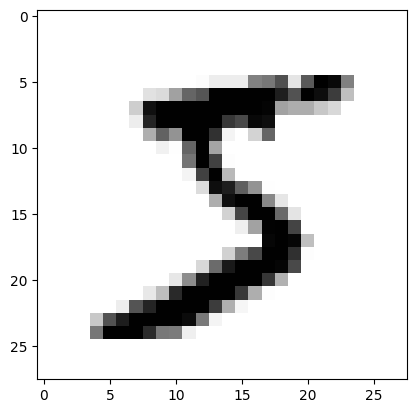

In [13]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

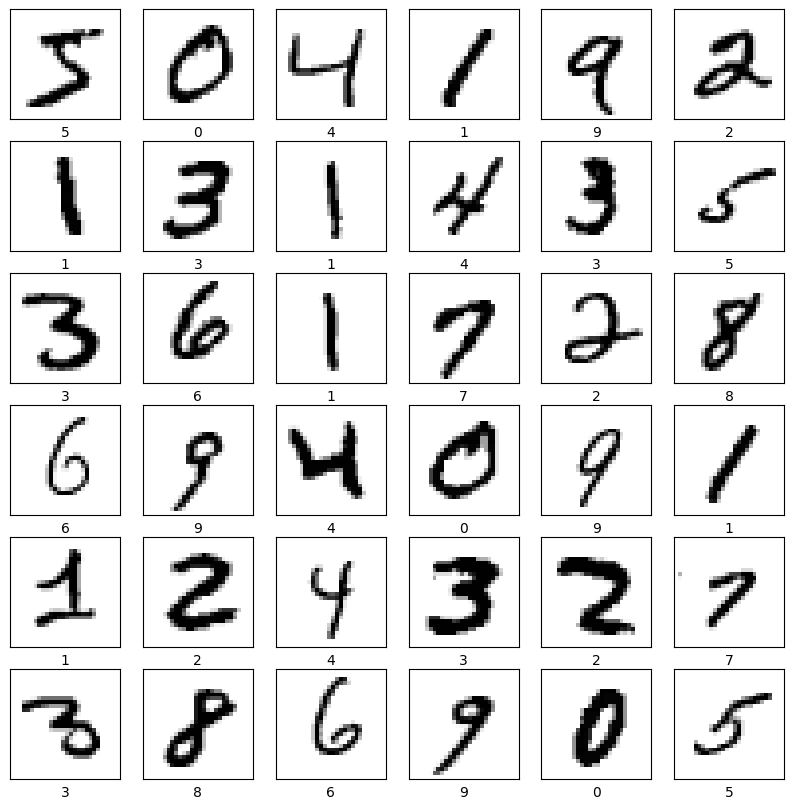

In [14]:
numbers_to_display = 36
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10, 10))

for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

## Reshaping the data

In order to use **Convolution layers** we need to reshape our data and add a color channel to it. As you've noticed currently every digit has a shape of `(28, 28)` which means that it is a 28x28 matrix of color values form `0` to `255`. We need to reshape it to `(28, 28, 1)` shape so that each pixel potentially may have multiple channels (like Red, Green and Blue).

In [15]:
x_train_with_channels = x_train.reshape(
    x_train.shape[0], IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS
)

x_test_with_channels = x_test.reshape(
    x_test.shape[0], IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS
)

In [16]:
print("x_train_with_channels:", x_train_with_channels.shape)
print("x_test_with_channels:", x_test_with_channels.shape)

x_train_with_channels: (60000, 28, 28, 1)
x_test_with_channels: (10000, 28, 28, 1)


## Normalize the data

Here we're just trying to move from values range of `[0...255]` to `[0...1]`.

In [17]:
# x_train_normalized = x_train_with_channels / 255
# x_train_normalized = x_test_with_channels / 255

x_train_normalized = keras.utils.normalize(x_train_with_channels, axis=1)
x_test_normalized = keras.utils.normalize(x_test_with_channels, axis=1)

In [18]:
# Let's check just one row from the 0th image to see color chanel values after normalization.
x_train_normalized[0][20]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.04117838],
       [0.16813739],
       [0.28960162],
       [0.32790981],
       [0.36833534],
       [0.3689874 ],
       [0.34978968],
       [0.25961929],
       [0.12760592],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

## Build the model

We will use [Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential?version=stable) Keras model.

Then we will have two pairs of [Convolution2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D?version=stable) and [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D?version=stable) layers. The MaxPooling layer acts as a sort of downsampling using max values in a region instead of averaging.

After that we will use [Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten?version=stable) layer to convert multidimensional parameters to vector.

The last layer will be a [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?version=stable) layer with `10` [Softmax](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax?version=stable) outputs. The output represents the network guess. The 0-th output represents a probability that the input digit is `0`, the 1-st output represents a probability that the input digit is `1` and so on...


In [33]:
model = Sequential(
    [
        Convolution2D(
            input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
            kernel_size=5,
            filters=8,
            strides=1,
            activation=relu,
            kernel_initializer=VarianceScaling(),
        ),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Convolution2D(
            kernel_size=5,
            filters=16,
            strides=1,
            activation=relu,
            kernel_initializer=VarianceScaling(),
        ),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Flatten(),
        Dense(units=128, activation=relu),
        Dropout(0.2),
        Dense(
            units=10,
            activation=softmax,
            kernel_initializer=VarianceScaling(),
        ),
    ]
)

/Users/vmhieu/Documents/HUST/handwritten-digit-recognition/.env/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Here is our model summary so far.

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 8)      │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 16)       │         3,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,610 (146.91 KB)

 Trainable params: 37,610 (146.91 KB)

 Non-trainable params: 0 (0.00 B)

## Compile the model

In [21]:
adam_optimizer = Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=keras.losses.sparse_categorical_crossentropy,
    metrics=["accuracy"],
)

## Train the model

In [22]:
training_history = model.fit(
    x_train_normalized,
    y_train,
    epochs=10,
    validation_data=(x_test_normalized, y_test),
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.8546 - loss: 0.4732 - val_accuracy: 0.9763 - val_loss: 0.0727
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9763 - loss: 0.0781 - val_accuracy: 0.9851 - val_loss: 0.0462
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9835 - loss: 0.0541 - val_accuracy: 0.9877 - val_loss: 0.0365
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9868 - loss: 0.0409 - val_accuracy: 0.9884 - val_loss: 0.0324
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9891 - loss: 0.0353 - val_accuracy: 0.9892 - val_loss: 0.0329
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9903 - loss: 0.0293 - val_accuracy: 0.9891 - val_loss: 0.0327
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9925 - loss: 0.0233 - val_accuracy: 0.9878 - val_loss: 0.0392
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9933 - loss:

Let's see how the loss function was changing during the training. We expect it to get smaller and smaller on every next epoch.

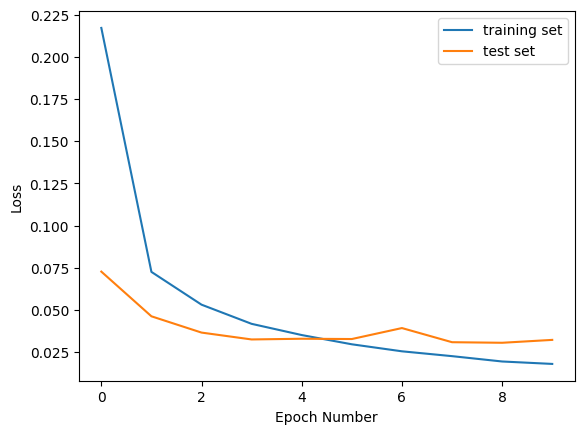

In [23]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='test set')
plt.legend()

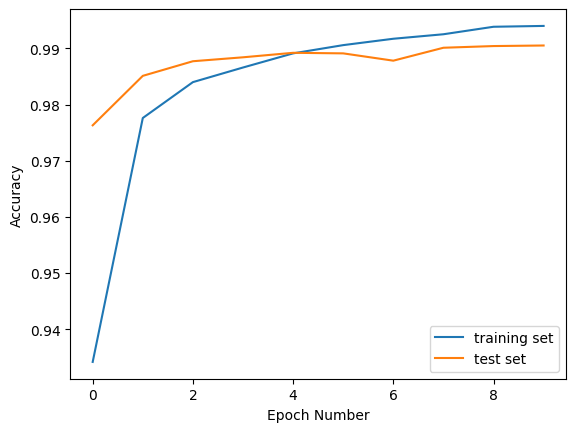

In [24]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='test set')
plt.legend()

## Evaluate model accuracy

We need to compare the accuracy of our model on **training** set and on **test** set. We expect our model to perform similarly on both sets. If the performance on a test set will be poor comparing to a training set it would be an indicator for us that the model is over fitted and we have a "high variance" issue.

### Training set accuracy

In [25]:
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9974 - loss: 0.0084


In [26]:
print('Training loss: ', train_loss)
print('Training accuracy: ', train_accuracy)

Training loss:  0.008420465514063835
Training accuracy:  0.9974333047866821


### Test set accuracy

In [27]:
validation_loss, validation_accuracy = model.evaluate(x_test_normalized, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9879 - loss: 0.0403


In [28]:
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

Validation loss:  0.03218649700284004
Validation accuracy:  0.9904999732971191


## Save the model

We will save the entire model to a `HDF5` file. The `.h5` extension of the file indicates that the model should be saved in Keras format as HDF5 file.

In [38]:
model_name = "digits_recognition_cnn"
model_format = "h5"
model.save(f"models/{model_name}.{model_format}", save_format=model_format)

Save the mode as JSON for front-end (JavaScript)

In [ ]:
tfjs.converters.save_keras_model(model, "models")